In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


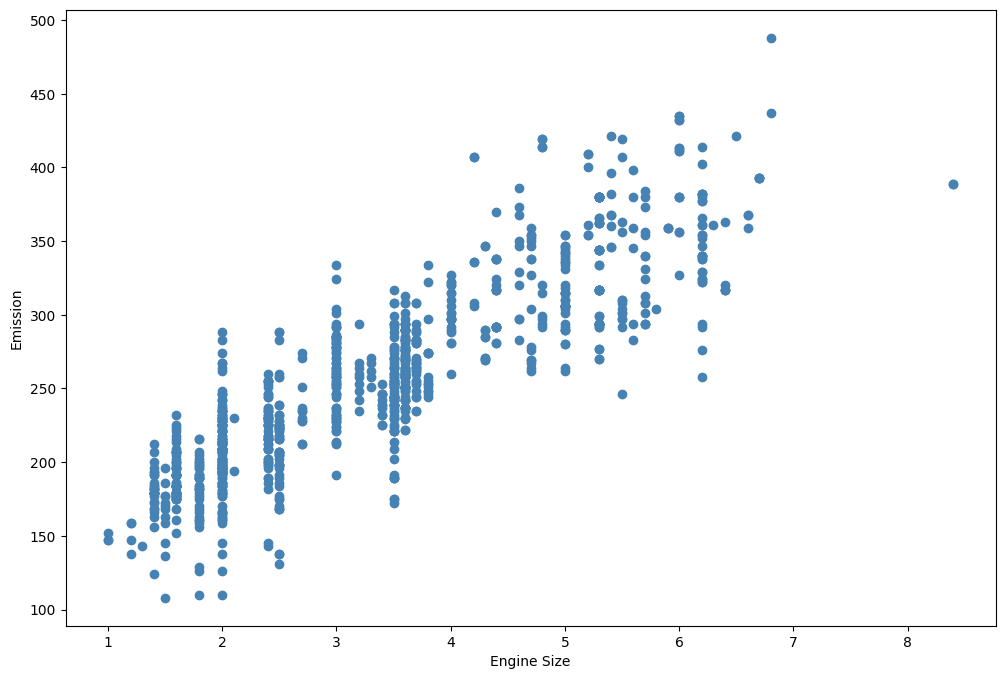

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [4]:
# Creating train and test dataset
# msk = np.random.rand(len(df)) < 0.8 yerine model_selection.train_test_split kullanılabilir

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.

2nd degree:
y = b + θ1 x + θ2 x^2

b = θ0

For example, the original feature set has only one feature: ENGINSIZE

If we select the segree of the polynomial to be 2:

It generates 3 features: degree=0, degree=1, degree=2

1, x and x^2

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
# test_x = np.asanyarray(test[['ENGINESIZE']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])

train_x = train[['ENGINESIZE']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values

poly = PolynomialFeatures(degree=2)

In [6]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    3.6  12.96]
 [ 1.    3.    9.  ]
 [ 1.    4.7  22.09]
 ...
 [ 1.    1.6   2.56]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]]


- Transformed data looks like features sets of multiple linear regression analysis.

2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [7]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [8]:
train_y = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.90841448 -1.28992173]]
Intercept:  [109.14764302]


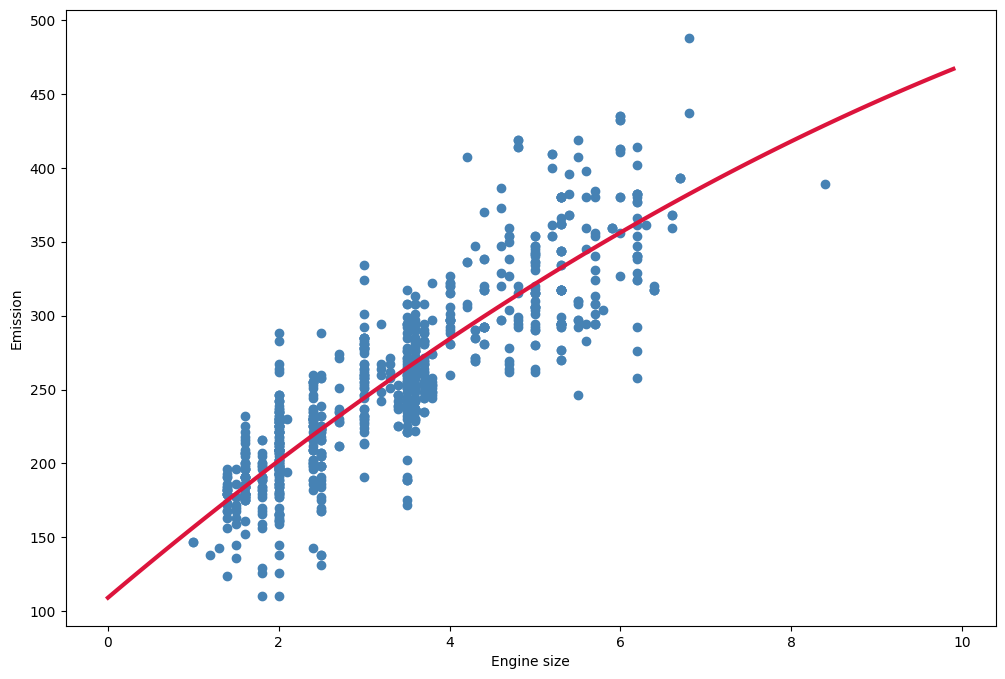

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
XX = np.arange(0.0, 10.0, 0.1) # line eğimi belirlenerek kör bir şekilde çizgi çizilir
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'crimson', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[109.14764302 114.02558525 118.87772905 123.70407441 128.50462133
 133.27936983 138.02831988 142.75147151 147.44882469 152.12037945
 156.76613577 161.38609365 165.9802531  170.54861412 175.0911767
 179.60794084 184.09890655 188.56407383 193.00344267 197.41701308
 201.80478505 206.16675859 210.50293369 214.81331036 219.0978886
 223.3566684  227.58964976 231.79683269 235.97821719 240.13380325
 244.26359087 248.36758006 252.44577082 256.49816314 260.52475703
 264.52555248 268.5005495  272.44974808 276.37314823 280.27074995
 284.14255323 287.98855807 291.80876448 295.60317246 299.371782
 30

# Evaluation
- Mean Absolute Error (MAE)
- 

In [11]:
# Evaluation
# Mean Absolute Error (MAE) 

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
# print(train_x_poly)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
print("RMSE: %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))

Mean absolute error: 23.06
Residual sum of squares (MSE): 908.45
R2-score: 0.72
RMSE: 30.14


In [12]:
print(f"Mean absolute error (MAE): {np.mean(np.absolute(test_y_ - test_y)):0.2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_ - test_y) ** 2):0.2f}")
print(f"R2-score: {r2_score(test_y_ , test_y):0.2f}")

Mean absolute error (MAE): 23.06
Residual sum of squares (MSE): 908.45
R2-score: 0.72


## Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [14]:
train_x = train[['ENGINESIZE']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values
# Try with degree three (cubic).
poly_features = PolynomialFeatures(degree=3)
# Transforms the existing features to higher degree features.
train_x_poly3 = poly_features.fit_transform(train_x)

# Fit the transformed features to Linear Regression
clf3 = linear_model.LinearRegression()
train_y = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.90841448 -1.28992173]]
Intercept:  [109.14764302]


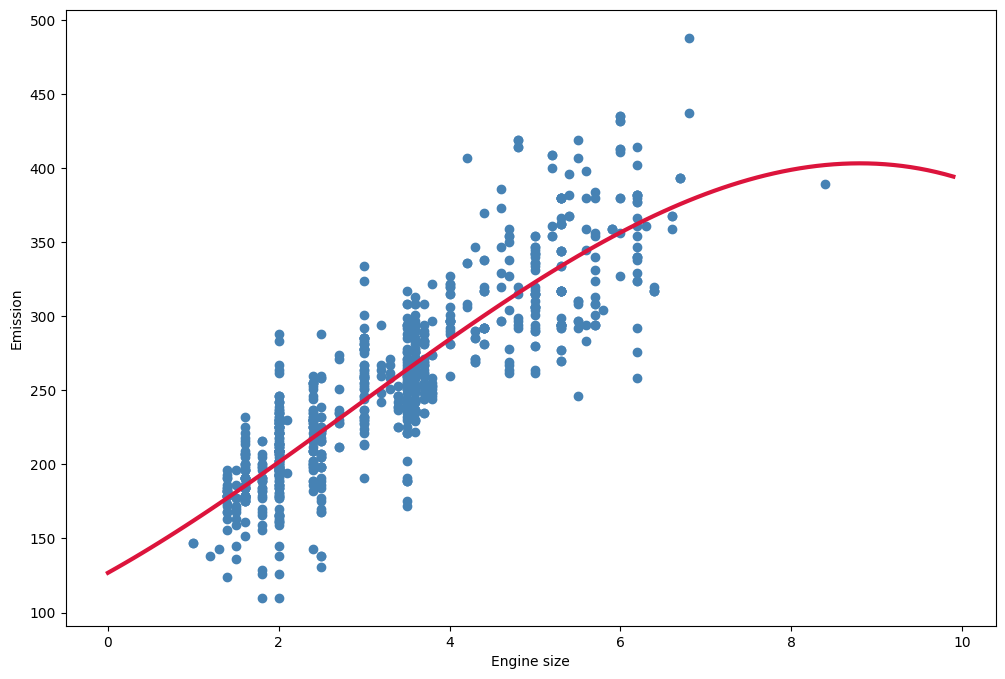

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX+ clf3.coef_[0][2]*np.power(XX, 2)+ clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, 'crimson', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [16]:
from sklearn.metrics import r2_score

test_x_poly3 = poly_features.transform(test_x)
test_y_3 = clf3.predict(test_x_poly3)

print(f"Mean absolute error (MAE): {np.mean(np.absolute(test_y_3 - test_y)):0.2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y_3 - test_y) ** 2):0.2f}")
print(f"R2-score: {r2_score(test_y_3 , test_y):0.2f}")
print(f"RMSE: {np.sqrt(np.mean((test_y_3 - test_y) ** 2)):0.2f}")

Mean absolute error (MAE): 22.94
Residual sum of squares (MSE): 897.77
R2-score: 0.72
RMSE: 29.96
